In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
import numpy as np


# Hypermodel class for the Feed Forward Neural Network

In [2]:
class FeedForwardNN(kt.HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.InputLayer(input_shape=self.input_shape))

        for i in range(hp.Int('num_layers', min_value=1, max_value=3, step=1)):
            model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
                                   activation='relu'))

        model.add(layers.Dense(self.num_classes, activation='softmax'))

        optimizer = hp.Choice('optimizer', values=['adam', 'sgd'])
        model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model


In [3]:
input_shape = (20,)
num_classes = 2

hypermodel = FeedForwardNN(input_shape=input_shape, num_classes=num_classes)


In [4]:

tuner = kt.BayesianOptimization(hypermodel.build, objective='val_accuracy', max_trials=5)


Reloading Tuner from .\untitled_project\tuner0.json


In [5]:
x_train = np.random.rand(1000, 20)
y_train = np.random.randint(2, size=(1000,))


# Split the data into training and validation sets

In [6]:
x_val = x_train[-200:]
y_val = y_train[-200:]
x_train = x_train[:-200]
y_train = y_train[:-200]


# Model with the best hyperparameters

In [7]:
tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


best_hps = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters
print("*"*125)
print(f"Best Hyperparameters: {best_hps}")
print('\n')
print("*"*125)

best_model = hypermodel.build(best_hps)
print("*"*125)
print('\n\n')
history = best_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
print('\n\n')
print("*"*125)
print('\n')
best_model.summary()


*****************************************************************************************************************************
Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x00000195F4FB7510>


*****************************************************************************************************************************
*****************************************************************************************************************************



Epoch 1/10
25/25 [==============================] - 1s 7ms/step - loss: 0.6957 - accuracy: 0.5288 - val_loss: 0.7033 - val_accuracy: 0.4700
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5200 - val_loss: 0.6959 - val_accuracy: 0.5250
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5213 - val_loss: 0.6946 - val_accuracy: 0.4950
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0

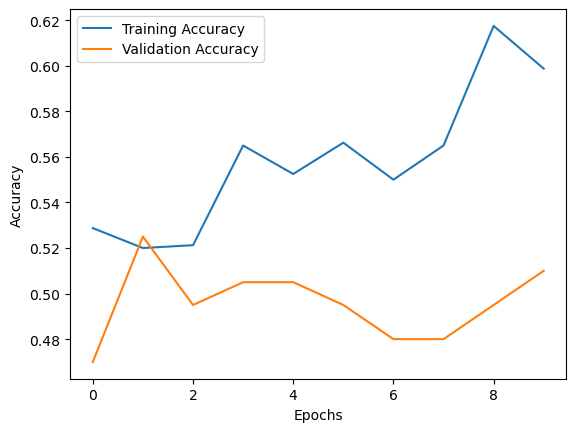

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()